In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.cm as cm
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [2]:
df = pd.read_csv("C:\\Users\\hp\\Downloads\\force2020_data.csv")
df

,RHOB,GR,DEPTH_MD,NPHI,PEF,DTC
0,1.884186,80.200851,494.528,NaN,20.915468,161.131180
1,1.889794,79.262886,494.680,NaN,19.383013,160.603470
2,1.896523,74.821999,494.832,NaN,22.591518,160.173615
3,1.891913,72.878922,494.984,NaN,32.191910,160.149429
4,1.880034,71.729141,495.136,NaN,38.495632,160.128342
...,...,...,...,...,...,...
18265,2.630211,19.418915,3271.416,0.187811,NaN,NaN
18266,2.643114,21.444370,3271.568,0.185574,NaN,NaN
18267,2.681300,22.646879,3271.720,0.176074,NaN,NaN
18268,2.738337,22.253584,3271.872,0.174617,NaN,NaN


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18270 entries, 0 to 18269
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   RHOB      18270 non-null  float64
 1   GR        18270 non-null  float64
 2   DEPTH_MD  18270 non-null  float64
 3   NPHI      14032 non-null  float64
 4   PEF       16440 non-null  float64
 5   DTC       18189 non-null  float64
dtypes: float64(6)
memory usage: 856.5 KB


In [4]:
df.describe()

,RHOB,GR,DEPTH_MD,NPHI,PEF,DTC
count,18270.000000,18270.000000,18270.000000,14032.000000,16440.000000,18189.000000
mean,2.110451,63.847477,1883.228478,0.404547,3.463851,125.106178
std,0.297725,28.636331,801.941195,0.133532,2.561239,30.618337
min,1.404576,6.191506,494.528000,0.024330,1.010027,55.726753
25%,1.963399,43.866690,1188.750000,0.315346,2.320836,90.883087
50%,2.055079,66.777851,1882.972000,0.448527,2.790249,141.300461
75%,2.381963,81.542681,2577.802000,0.506343,4.267342,148.048355
max,2.927888,499.022583,3272.024000,0.800262,66.030319,175.953140


In [5]:
df.isna().sum()

#dropping the missing values may affect the dataset size

RHOB           0
GR             0
DEPTH_MD       0
NPHI        4238
PEF         1830
DTC           81
dtype: int64

In [6]:
df.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
18265    False
18266    False
18267    False
18268    False
18269    False
Length: 18270, dtype: bool

In [7]:
df.duplicated().sum()

0

In [8]:
# df = df.dropna()
# df
#this can't be dropped

### Filling missing values

In [10]:
# num_df = df.select_dtypes(include="number")
# cat_df = df.select_dtypes(include="object_")

In [11]:
# print("Numerical columns are")
# num_cols = num_df.columns.tolist()
# print(num_cols)

# cat_cols = cat_df.columns.tolist()
# print("Categorical columns are")
# print(cat_cols)

In [12]:
# for col in num_cols:
#   num_df[col] = num_df[col].fillna(num_df[col].median())

In [13]:
# num_df.isna().sum()

In [14]:
for col in df:
    df[col] = df[col].fillna(df[col].median())

## Since nocategorical columns(no object), we didn't split them

In [15]:
df.isna().sum()

RHOB        0
GR          0
DEPTH_MD    0
NPHI        0
PEF         0
DTC         0
dtype: int64

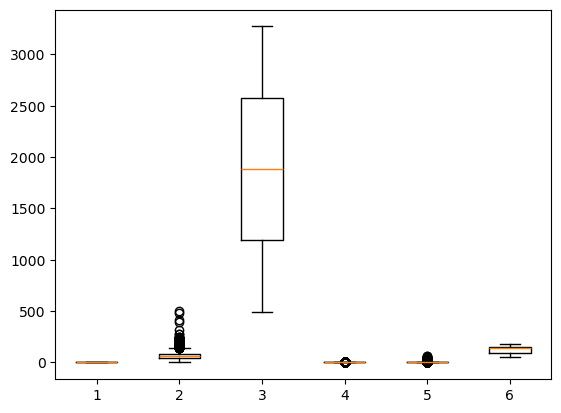

In [16]:
plt.boxplot(df)
plt.show()

In [17]:
def remove_outliers(df, column_name):
    q1 = df[column_name].quantile(0.25)
    q3 = df[column_name].quantile(0.75)
    iqr = q3-q1
    upper_bound = q3+1.5*iqr
    lower_bound = q1-1.5*iqr
    df[column_name] = df[column_name].clip(upper=upper_bound)
    df[column_name] = df[column_name].clip(lower=lower_bound)
    return df[column_name]

In [18]:
for col in df:
    df[col] = remove_outliers(df, col)
    


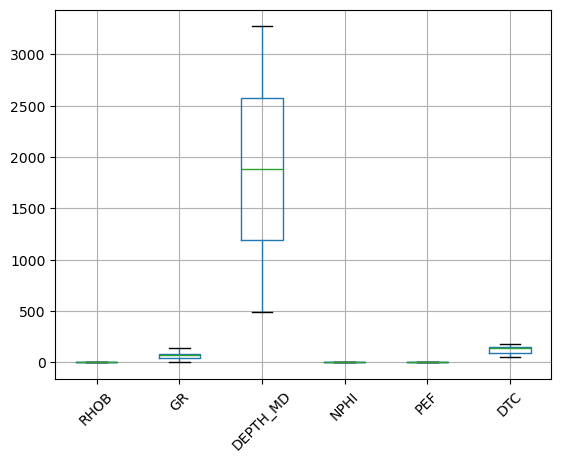

In [19]:
df.boxplot()
plt.xticks(rotation=45)
plt.show()

In [20]:
std_scaler = StandardScaler()
df[["RHOB","GR","DEPTH_MD","NPHI","PEF","DTC"]] = std_scaler.fit_transform(df[["RHOB","GR","DEPTH_MD","NPHI","PEF","DTC"]])
df.tail()

,RHOB,GR,DEPTH_MD,NPHI,PEF,DTC
18265,1.745819,-1.683564,1.731081,-1.966486,-0.307889,0.527422
18266,1.789158,-1.605864,1.731271,-1.985785,-0.307889,0.527422
18267,1.917421,-1.559734,1.731461,-2.067770,-0.307889,0.527422
18268,2.109002,-1.574822,1.731650,-2.080339,-0.307889,0.527422
18269,2.292346,-1.667797,1.731840,-2.062999,-0.307889,0.527422


### K Means Clustering

In [22]:
X = df[["RHOB", "GR", "DEPTH_MD","NPHI","PEF","DTC"]]
X.head()

,RHOB,GR,DEPTH_MD,NPHI,PEF,DTC
0,-0.759999,0.648114,-1.731721,0.283346,2.395861,1.176153
1,-0.741163,0.612133,-1.731532,0.283346,2.395861,1.158889
2,-0.718560,0.441774,-1.731342,0.283346,2.395861,1.144827
3,-0.734045,0.367235,-1.731152,0.283346,2.395861,1.144036
4,-0.773944,0.323128,-1.730963,0.283346,2.395861,1.143346


In [23]:
wcss = []   #WithinClusterSumofSquares
for i in range(1,11):
    kmeans = KMeans(n_clusters = i, init = "k-means++",
                   max_iter = 500, n_init = 10, random_state = 0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

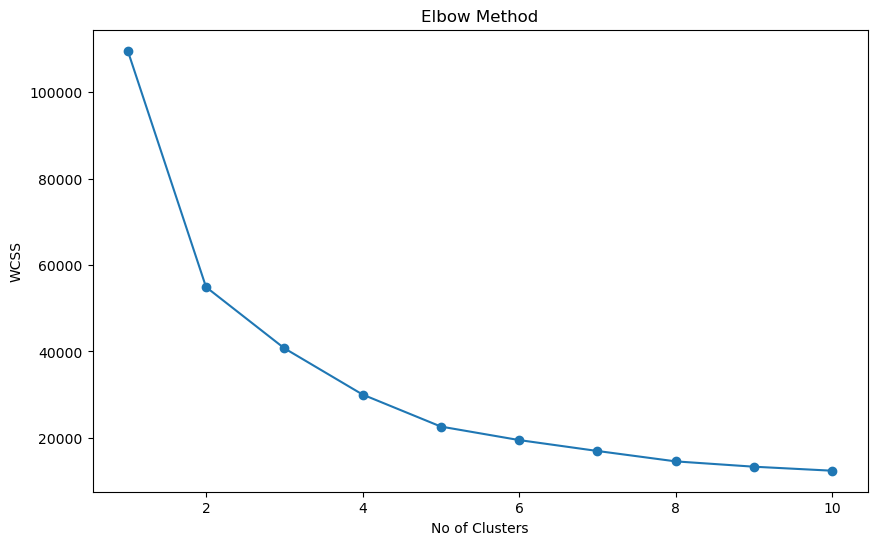

In [24]:
#Plotting Elbow Method

plt.figure(figsize = (10,6))
plt.plot(range(1,11), wcss, marker="o")
plt.title("Elbow Method")
plt.xlabel("No of Clusters")
plt.ylabel("WCSS")
plt.show()

In [25]:
# applying kmeans clustering with optimal number of clusters
kmeans = KMeans(n_clusters = 5, init = 'k-means++',
                max_iter = 500, n_init = 10, random_state = 0)

y_kmeans = kmeans.fit_predict(X)

In [26]:
df['Cluster'] = y_kmeans
df.tail()

,RHOB,GR,DEPTH_MD,NPHI,PEF,DTC,Cluster
18265,1.745819,-1.683564,1.731081,-1.966486,-0.307889,0.527422,1
18266,1.789158,-1.605864,1.731271,-1.985785,-0.307889,0.527422,1
18267,1.917421,-1.559734,1.731461,-2.067770,-0.307889,0.527422,1
18268,2.109002,-1.574822,1.731650,-2.080339,-0.307889,0.527422,1
18269,2.292346,-1.667797,1.731840,-2.062999,-0.307889,0.527422,1


In [27]:
df['Cluster'] = y_kmeans
df.tail()

,RHOB,GR,DEPTH_MD,NPHI,PEF,DTC,Cluster
18265,1.745819,-1.683564,1.731081,-1.966486,-0.307889,0.527422,1
18266,1.789158,-1.605864,1.731271,-1.985785,-0.307889,0.527422,1
18267,1.917421,-1.559734,1.731461,-2.067770,-0.307889,0.527422,1
18268,2.109002,-1.574822,1.731650,-2.080339,-0.307889,0.527422,1
18269,2.292346,-1.667797,1.731840,-2.062999,-0.307889,0.527422,1


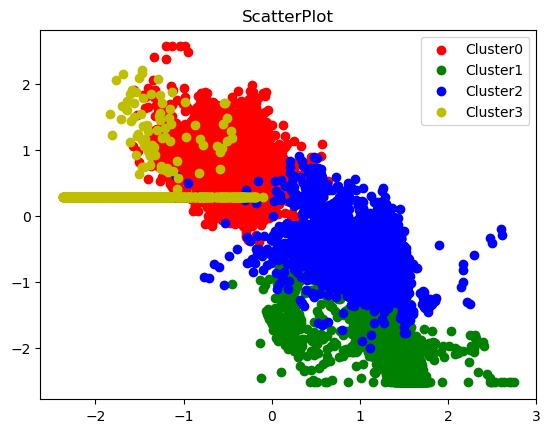

In [28]:
 colors = ['r','g','b','y','m']

for i in range(4):
  cluster_data = X[y_kmeans ==i]
  plt.title("ScatterPlot")
  plt.scatter(cluster_data['RHOB'],
              # cluster_data['GR'],
              # cluster_data["DEPTH_MD"],
              cluster_data["NPHI"],
              # cluster_data["PEF"],
              # cluster_data["DTC"],
              c=colors[i],
              label = f'Cluster{i}')
  plt.legend()


In [29]:
# def predict_cluster(RHOB, NPHI):
#   new_data = [[RHOB, NPHI]]
#   cluster = kmeans.predict(new_data)
#   return cluster[0]

In [30]:
from sklearn.metrics import silhouette_score
  #Silhouette score of kmeans clustering
silhouette_avg1 = silhouette_score(X, y_kmeans)
print(silhouette_avg1)

0.46956380230597633


In [31]:
X = df[["RHOB","DTC"]]
X.head()

,RHOB,DTC
0,-0.759999,1.176153
1,-0.741163,1.158889
2,-0.718560,1.144827
3,-0.734045,1.144036
4,-0.773944,1.143346


In [32]:
kmeans = KMeans(n_clusters = 2, init = 'k-means++',
                max_iter = 500, n_init = 10, random_state = 0)

y_kmeans = kmeans.fit_predict(X)

In [33]:
df['Cluster'] = y_kmeans
df.tail()

,RHOB,GR,DEPTH_MD,NPHI,PEF,DTC,Cluster
18265,1.745819,-1.683564,1.731081,-1.966486,-0.307889,0.527422,0
18266,1.789158,-1.605864,1.731271,-1.985785,-0.307889,0.527422,0
18267,1.917421,-1.559734,1.731461,-2.067770,-0.307889,0.527422,0
18268,2.109002,-1.574822,1.731650,-2.080339,-0.307889,0.527422,0
18269,2.292346,-1.667797,1.731840,-2.062999,-0.307889,0.527422,0


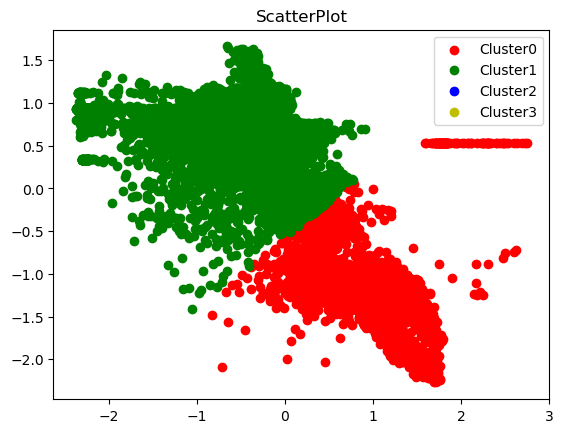

In [34]:
 colors = ['r','g','b','y','m']

for i in range(4):
  cluster_data = X[y_kmeans ==i]
  plt.title("ScatterPlot")
  plt.scatter(cluster_data['RHOB'],
              cluster_data["DTC"],
              c=colors[i],
              label = f'Cluster{i}')
  plt.legend()

In [35]:
from sklearn.metrics import silhouette_score
  #Silhouette score of kmeans clustering
silhouette_avg1 = silhouette_score(X, y_kmeans)
print(silhouette_avg1)

0.674932309682575


In [38]:
df.corr()

,RHOB,GR,DEPTH_MD,NPHI,PEF,DTC,Cluster
RHOB,1.000000,0.180777,0.745932,-0.721365,0.459232,-0.811633,-0.800931
GR,0.180777,1.000000,0.130395,0.239898,-0.160352,0.087719,-0.032903
DEPTH_MD,0.745932,0.130395,1.000000,-0.554812,0.556702,-0.822428,-0.799412
NPHI,-0.721365,0.239898,-0.554812,1.000000,-0.324632,0.831858,0.819590
PEF,0.459232,-0.160352,0.556702,-0.324632,1.000000,-0.518245,-0.408584
DTC,-0.811633,0.087719,-0.822428,0.831858,-0.518245,1.000000,0.916164
Cluster,-0.800931,-0.032903,-0.799412,0.819590,-0.408584,0.916164,1.000000


In [ ]:
#max positive corr for NPHI and DTC

In [40]:
X = df[["NPHI","DTC"]]
X.head()
kmeans = KMeans(n_clusters = 2, init = 'k-means++',
                max_iter = 500, n_init = 10, random_state = 0)

y_kmeans = kmeans.fit_predict(X)
df['Cluster'] = y_kmeans
df.tail()

,RHOB,GR,DEPTH_MD,NPHI,PEF,DTC,Cluster
18265,1.745819,-1.683564,1.731081,-1.966486,-0.307889,0.527422,1
18266,1.789158,-1.605864,1.731271,-1.985785,-0.307889,0.527422,1
18267,1.917421,-1.559734,1.731461,-2.067770,-0.307889,0.527422,1
18268,2.109002,-1.574822,1.731650,-2.080339,-0.307889,0.527422,1
18269,2.292346,-1.667797,1.731840,-2.062999,-0.307889,0.527422,1


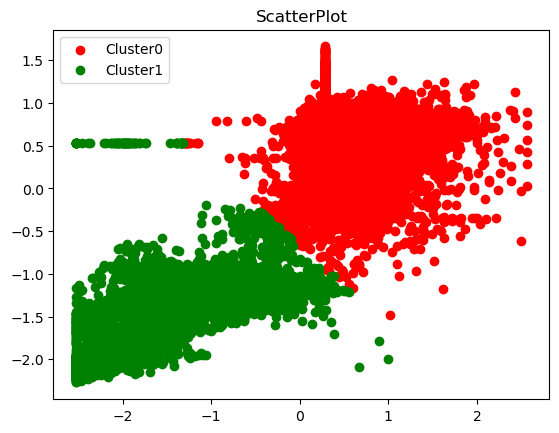

In [41]:
 colors = ['r','g','b','y','m']

for i in range(2):
  cluster_data = X[y_kmeans ==i]
  plt.title("ScatterPlot")
  plt.scatter(cluster_data['NPHI'],
              cluster_data["DTC"],
              c=colors[i],
              label = f'Cluster{i}')
  plt.legend()

In [42]:
from sklearn.metrics import silhouette_score
  #Silhouette score of kmeans clustering
silhouette_avg1 = silhouette_score(X, y_kmeans)
print(silhouette_avg1)

0.7042718955974755


In [44]:
#max silhouette_score obtained when taking NPHI and DTC as cluster data, n_cluster = 2 and iteration 500

In [45]:
X = df[["NPHI","GR"]]
X.head()
kmeans = KMeans(n_clusters = 3, init = 'k-means++',
                max_iter = 500, n_init = 10, random_state = 0)

y_kmeans = kmeans.fit_predict(X)
df['Cluster'] = y_kmeans
df.tail()

,RHOB,GR,DEPTH_MD,NPHI,PEF,DTC,Cluster
18265,1.745819,-1.683564,1.731081,-1.966486,-0.307889,0.527422,2
18266,1.789158,-1.605864,1.731271,-1.985785,-0.307889,0.527422,2
18267,1.917421,-1.559734,1.731461,-2.067770,-0.307889,0.527422,2
18268,2.109002,-1.574822,1.731650,-2.080339,-0.307889,0.527422,2
18269,2.292346,-1.667797,1.731840,-2.062999,-0.307889,0.527422,2


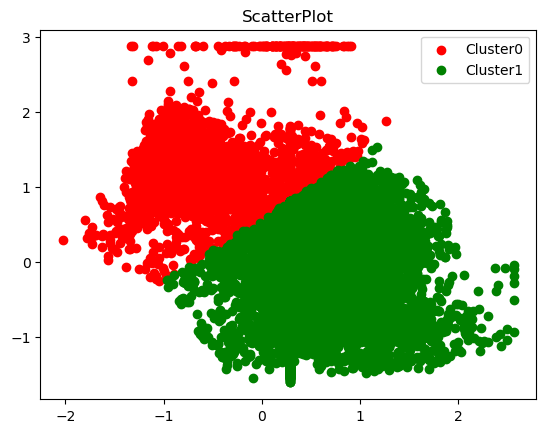

In [46]:
 colors = ['r','g','b','y','m']

for i in range(2):
  cluster_data = X[y_kmeans ==i]
  plt.title("ScatterPlot")
  plt.scatter(cluster_data['NPHI'],
              cluster_data["GR"],
              c=colors[i],
              label = f'Cluster{i}')
  plt.legend()

In [47]:
from sklearn.metrics import silhouette_score
  #Silhouette score of kmeans clustering
silhouette_avg1 = silhouette_score(X, y_kmeans)
print(silhouette_avg1)

0.5118726763522705
